## Hydrometeor Classification in Radars using Machine Learning

### Dataset features:
1. Independent variables: 7
2. Dependent variable: 11 (categorical)
3. Size of data: 3,159,754 (3.2 million data points)
4. 10% split into test data<br>
Baseline classification model accuracy is to be tested using standard classification algorithms

In [46]:
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
os.chdir('C:/Users/yashg/OneDrive/Desktop/CMU/Project/December/Matthews_Radar_files')

In [47]:
import glob
master=pd.DataFrame()
for file in glob.glob("*.cdf"):
    data=Dataset(file)
    ref=np.ma.filled(data['DZ'][:].flatten())
    u=np.ma.filled(data['U'][:].flatten())
    v=np.ma.filled(data['V'][:].flatten())
    con=np.ma.filled(data['Con'][:].flatten())
    Vor=np.ma.filled(data['Vor'][:].flatten())
    Wvar=np.ma.filled(data['Wvar'][:].flatten())
    vt=np.ma.filled(data['VT'][:].flatten())
    hid=np.ma.filled(data['HID'][:].flatten())
    cols=['Reflectivity','U','V','Con','Vor','Wvar','VT','HID']
    var=[ref,u,v,con,Vor,Wvar,vt,hid]
    d={}
    for i,kk in enumerate(cols):
        d.update({kk:var[i]})
    df=pd.DataFrame(d)    
    master=master.append(df,ignore_index = True)

In [48]:
badval=data['DZ'].bad_value

In [49]:
df=master
col=df.columns
for m in col:
    df=df[df[m]!=badval]

In [50]:
df.to_csv('C:/Users/yashg/Documents/Skill Building/full_dataset.csv')

### Importing pre-existing dataset

In [51]:
df=pd.read_csv('C:/Users/yashg/Documents/Skill Building/full_dataset.csv')

In [52]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1].astype('int32')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Decision Tree Classifier

In [54]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_tr=model.predict(X_train)
from sklearn.metrics import accuracy_score

dt_acc=accuracy_score(y_test, y_predict)
dt_train=accuracy_score(y_train, y_tr)

## KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
y_tr=model.predict(X_train)
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test, y_predict)
knn_train=accuracy_score(y_train, y_tr)

## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
gnb_tr=gnb.predict(X_train) 
# accuracy on X_test 
gnb_acc= gnb.score(X_test, y_test)
gnb_tr= gnb.score(X_train, y_train)

## Random Guessing

In [57]:
import random
random.seed(42)
y_pred=np.random.randint(-1,10,len(y_test))
y_tr=np.random.randint(-1,10,len(y_train))
r_acc=accuracy_score(y_test,y_pred)
r_tr=accuracy_score(y_train,y_tr)

## Comparing Performance

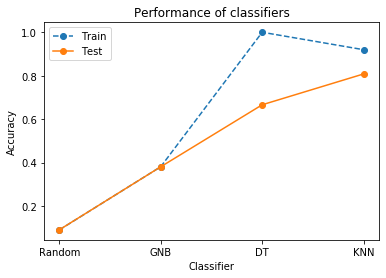

In [58]:
classifiers=['Random','GNB','DT','KNN']
acc=[r_acc,gnb_acc,dt_acc,knn_acc]
acc_tr=[r_tr,gnb_tr,dt_train,knn_train]
import matplotlib.pyplot as plt
plt.plot(classifiers,acc_tr,'o--',label='Train')
plt.plot(classifiers,acc,'o-',label='Test')
plt.legend()
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Performance of classifiers')
plt.show()

Performs best on a KNN as the baseline model. Forms the premise to develop a deeper neural network. <br>
Baseline classification model has 75.8% test accuracy and 89.03% for KNN